### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow_addons as tfa
#from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D


#from keras.utils import plot_model


print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.5.0


In [2]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.resnet50 import ResNet50



from tensorflow.keras.regularizers import l2

In [3]:
from tqdm import tqdm
import cv2
import re
from tensorflow.keras.layers import MaxPooling2D

### Data Pre-Processing

In [4]:
WORK_DIR = './dataset/'

CLASSES = [ 'CN','AD']


### Make DataFrame

In [5]:
CN_number = len(os.listdir("E:\hippocampus\dataset_hippocampus_CN_AD_3300_3300\CN"))
AD_number = len(os.listdir("E:\hippocampus\dataset_hippocampus_CN_AD_3300_3300\AD"))

In [6]:
len(os.listdir("E:\hippocampus\dataset_hippocampus_CN_AD_3300_3300\AD"))

3236

In [7]:
images = [[] for i in range(AD_number)]  #6518
labels = [[] for i in range(AD_number)]
# for subfolder in tqdm(os.listdir("E:/dataset_CN_AD")):
#     subfolder_path = os.path.join("E:/dataset_CN_AD", subfolder)  #AD CN MCI folder
for ind , folder in enumerate(os.listdir("E:\hippocampus\dataset_hippocampus_CN_AD_3300_3300\AD")):    #folder = 0,1,2....,2294
    subfolder_path2=os.path.join("E:\hippocampus\dataset_hippocampus_CN_AD_3300_3300\AD",folder)   
    for image_filename in os.listdir(subfolder_path2):    #ex :0的所有切片圖
        image_path = os.path.join(subfolder_path2, image_filename)
        images[ind].append(image_path)
    labels[ind].append('AD')
df = pd.DataFrame({'image': images, 'label': labels})
df

,image,label
0,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
1,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
2,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
3,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
4,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
...,...,...
3231,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
3232,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
3233,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
3234,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]


In [8]:
images = [[] for i in range(CN_number)]  #6518
labels = [[] for i in range(CN_number)]

# for subfolder in tqdm(os.listdir("E:/dataset_CN_AD")):
#     subfolder_path = os.path.join("E:/dataset_CN_AD", subfolder)  #AD CN MCI folder
for ind , folder in enumerate(os.listdir("E:\hippocampus\dataset_hippocampus_CN_AD_3300_3300\CN")):    #folder = 0,1,2....,2294
    subfolder_path2=os.path.join("E:\hippocampus\dataset_hippocampus_CN_AD_3300_3300\CN",folder)   
    for image_filename in os.listdir(subfolder_path2):    #ex :0的所有切片圖
        image_path = os.path.join(subfolder_path2, image_filename)
        images[ind].append(image_path)
    labels[ind].append('CN')
df2 = pd.DataFrame({'image': images, 'label': labels})
df2

,image,label
0,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]
1,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]
2,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]
3,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]
4,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]
...,...,...
3685,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]
3686,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]
3687,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]
3688,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]


In [9]:
df = pd.concat([df, df2],ignore_index=True)

In [10]:
df

,image,label
0,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
1,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
2,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
3,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
4,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[AD]
...,...,...
6921,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]
6922,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]
6923,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]
6924,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,[CN]


In [11]:
df['label']

0       [AD]
1       [AD]
2       [AD]
3       [AD]
4       [AD]
        ... 
6921    [CN]
6922    [CN]
6923    [CN]
6924    [CN]
6925    [CN]
Name: label, Length: 6926, dtype: object

### 去掉label的list

In [12]:
for ind , label in enumerate(df['label']):
    df['label'][ind] = label[0]


df


,image,label
0,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,AD
1,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,AD
2,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,AD
3,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,AD
4,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,AD
...,...,...
6921,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,CN
6922,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,CN
6923,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,CN
6924,[E:\hippocampus\dataset_hippocampus_CN_AD_3300...,CN


3690 3236


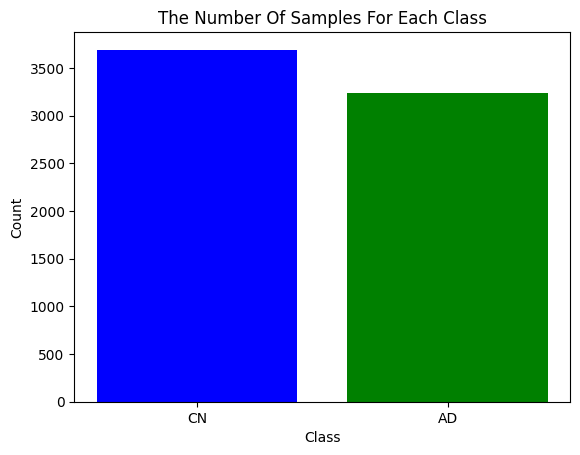

In [13]:
# 使用 value_counts() 獲取各類標籤的計數
counts = df['label'][:].value_counts()

# 從 counts 中獲取 'CN' 和 'MCI' 的計數，如果不存在則返回0
a = counts.get('CN', 0)

c = counts.get('AD', 0)  # 如果你只關心 'CN', 'MCI' 和 'Other'

# 如果你想計算不是 'CN' 或 'MCI' 的所有其他類別
# 你可以將所有值加起來，然後減去 'CN' 和 'MCI' 的總和
#c = counts.sum() - (a + b)

# 輸出結果
print(a, c)
labels = ['CN', 'AD']
counts = [a, c]

# 使用条形图展示计数
plt.bar(labels, counts, color=['blue', 'green'])

# 添加标题和轴标签
plt.title('The Number Of Samples For Each Class')
plt.xlabel('Class')
plt.ylabel('Count')

# 显示图表
plt.show()

### 視覺化

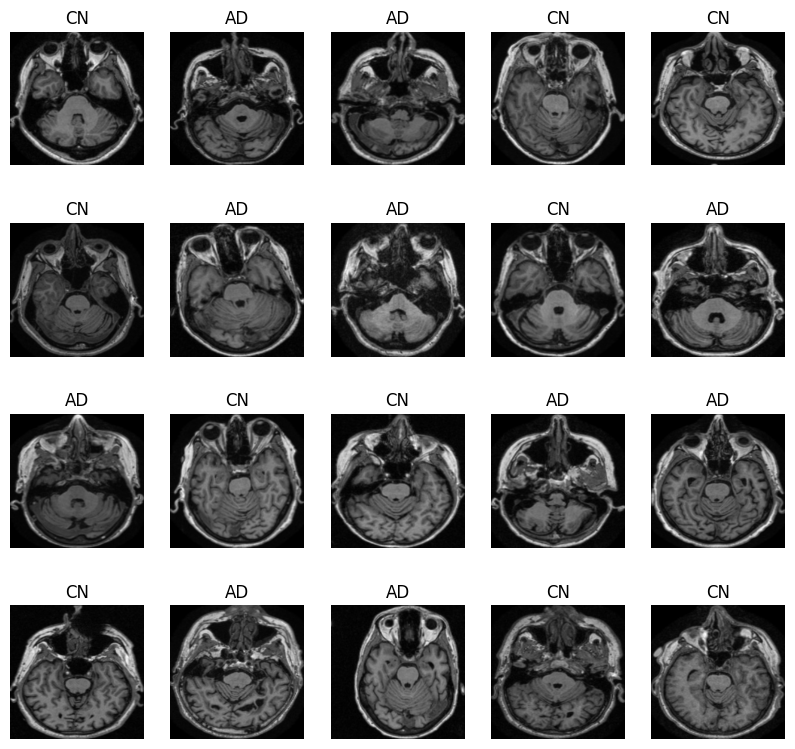

In [14]:
plt.figure(figsize=(10,12))
for n,i in enumerate(np.random.randint(0,len(df),20)):
    plt.subplot(5,5,n+1)
    img=cv2.imread(df.image[i][20])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=12)

### 0.5,0.55,0.6壓縮的切片

In [14]:
stack_array = []
path = 'D:/bigwind/stack_images_ADCN_3slides_hippocampus_000102_NOSMOTE'
for ind , data in enumerate(os.listdir(path)):
    path2 = os.path.join( 'D:/bigwind/stack_images_ADCN_3slides_hippocampus_000102_NOSMOTE',  data)
    
    array = np.load(path2)

    stack_array.append(array)

In [15]:
stack_array[0].shape

(3, 256, 256)

### Normalize

In [16]:
for ind , data in enumerate(stack_array):
    stack_array[ind] = data / data.max()


### Reshape / permute

In [17]:
for ind , array in enumerate(stack_array):

    stack_array[ind] = np.array(tf.transpose(array,perm=[1,2,0]))

In [18]:
stack_array[0].shape

(256, 256, 3)

In [19]:
type(stack_array)

list

### 處理資料型態

In [20]:
stack_array = np.array(stack_array)

In [21]:
stack_array.shape

(6926, 256, 256, 3)

In [22]:
labels2=[]
for i in df['label']:
    labels2.append(i)

In [23]:
len(labels2)

6926

In [24]:


# 标签到数字的映射字典
label_map = {'CN': [1,0], 'AD': [0,1]}

# 将标签列表替换为数字
labels_as_numbers = [np.array(label_map[label]) for label in labels2]

print(len(labels_as_numbers))

6926


In [25]:
train_dataset = stack_array

#test_examples = stack_array[1835:]
#test_labels = labels_as_numbers[1835:]

In [26]:
train_dataset.shape

(6926, 256, 256, 3)

In [27]:
train_labels_dataset = labels_as_numbers

In [28]:
train_labels_dataset[0].shape

(2,)

In [29]:
train_labels_dataset

[array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([

In [30]:
train_labels_dataset = np.array(train_labels_dataset)

In [31]:
train_dataset.shape , train_labels_dataset.shape

((6926, 256, 256, 3), (6926, 2))

In [32]:
train_labels_dataset[1]

array([0, 1])

In [33]:
train_dataset.shape

(6926, 256, 256, 3)

In [34]:
p = np.array([0, 1])
a=0

c=0
for i in train_labels_dataset:
    if i[0] == 1:
        a+=1
    else:
        c+=1
print(a,c)

3690 3236


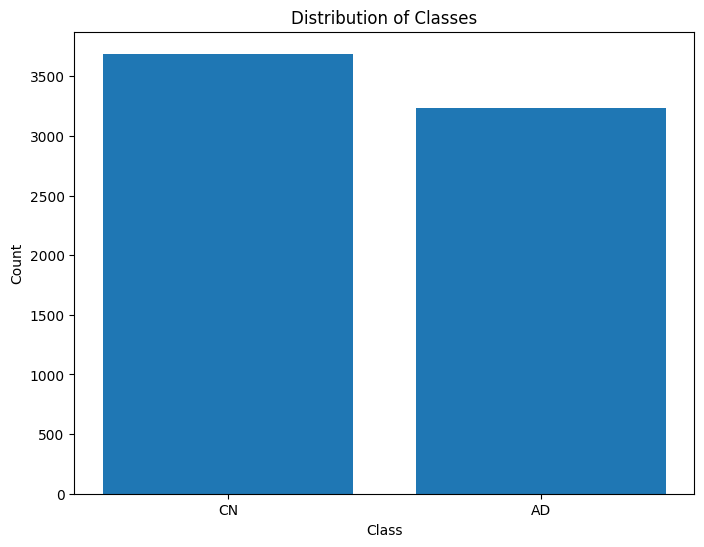

In [35]:

# 計算每個類別的樣本數量
p = np.array([[1, 0], [0, 1]])
count = [0,0]
class_names = ['CN', 'AD']
class_counts = [a ,c]

# 視覺化
plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

In [23]:
import imblearn
smote = imblearn.over_sampling.SMOTE(random_state=42)
train_data, train_labels = smote.fit_resample(train_dataset.reshape(-1, 256 * 256 * 3), train_labels_dataset)
train_data = train_data.reshape(-1, 256,256, 3)
print(train_data.shape, train_labels.shape)


(6600, 256, 256, 3) (6600, 1)


In [24]:
from tensorflow.keras.utils import to_categorical
train_labels =to_categorical(train_labels)

### 切割訓練測試集

In [36]:
train_data = train_dataset
train_labels = train_labels_dataset

In [37]:
#Splitting the data into train, test, and validation sets

train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42,shuffle=True)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42,shuffle=True)

### Using the InceptionV3 model as a base model for the task

In [38]:
inception_model = VGG19(input_shape=(256, 256, 3), include_top=False, weights="imagenet")

In [39]:
inception_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [40]:
for layer in inception_model.layers:
    layer.trainable=False

In [41]:
custom_inception_model = Sequential([
        inception_model,
        Dropout(0.5),
        GlobalAveragePooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu',kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu',kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu',kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu',kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        BatchNormalization(),
        Dense(2, activation='sigmoid')  
    ], name = "inception_cnn_model")

custom_inception_model.summary()

Model: "inception_cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 512)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)       

In [42]:
#Defining a custom callback function to stop training our model when accuracy goes above 99%

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('acc') > 0.99:
            print("\nReached accuracy threshold! Terminating training.")
            self.model.stop_training = True
            
            
my_callback = MyCallback()



In [43]:
class LearningRateLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr
        # 如果 lr 是一个 LearningRateSchedule，则需要计算当前的学习率
        if isinstance(lr, tf.keras.optimizers.schedules.LearningRateSchedule):
            lr = lr(self.model.optimizer.iterations)
        print(f"Epoch {epoch + 1}: Learning rate is {lr.numpy():.6f}")


learning_rate_logger = LearningRateLogger()

#ReduceLROnPlateau to stabilize the training process of the model
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=2,verbose=1)

In [44]:
METRICS = [tf.keras.metrics.BinaryAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc')]
           #tfa.metrics.F1Score(num_classes=3)]


CALLBACKS = [rop_callback,learning_rate_logger]

custom_inception_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                                loss=tf.keras.losses.BinaryCrossentropy(),
                                metrics=METRICS)
custom_inception_model.summary()

Model: "inception_cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 512)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)       

In [45]:
train_data.shape

(4432, 256, 256, 3)

In [46]:
train_labels

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]])

In [47]:
#Fit the training data to the model and validate it using the validation data
EPOCHS = 80

history = custom_inception_model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=EPOCHS,batch_size=50,callbacks=CALLBACKS)  



Epoch 1/80
89/89 [==============================] - 43s 329ms/step - loss: 10.1839 - acc: 0.5209 - auc: 0.5261 - val_loss: 8.5443 - val_acc: 0.4797 - val_auc: 0.4798
Epoch 1: Learning rate is 0.100000
Epoch 2/80
89/89 [==============================] - 22s 245ms/step - loss: 7.3439 - acc: 0.5564 - auc: 0.5744 - val_loss: 6.2256 - val_acc: 0.5596 - val_auc: 0.6225
Epoch 2: Learning rate is 0.100000
Epoch 3/80
89/89 [==============================] - 22s 245ms/step - loss: 5.3669 - acc: 0.5798 - auc: 0.6156 - val_loss: 4.5987 - val_acc: 0.6417 - val_auc: 0.6895
Epoch 3: Learning rate is 0.100000
Epoch 4/80
89/89 [==============================] - 22s 245ms/step - loss: 3.9815 - acc: 0.6279 - auc: 0.6663 - val_loss: 3.4537 - val_acc: 0.6634 - val_auc: 0.7279
Epoch 4: Learning rate is 0.100000
Epoch 5/80
89/89 [==============================] - 22s 246ms/step - loss: 3.0148 - acc: 0.6449 - auc: 0.6966 - val_loss: 2.6530 - val_acc: 0.6954 - val_auc: 0.7415
Epoch 5: Learning rate is 0.100000

### Tabulating the Results of our custom InceptionV3 model

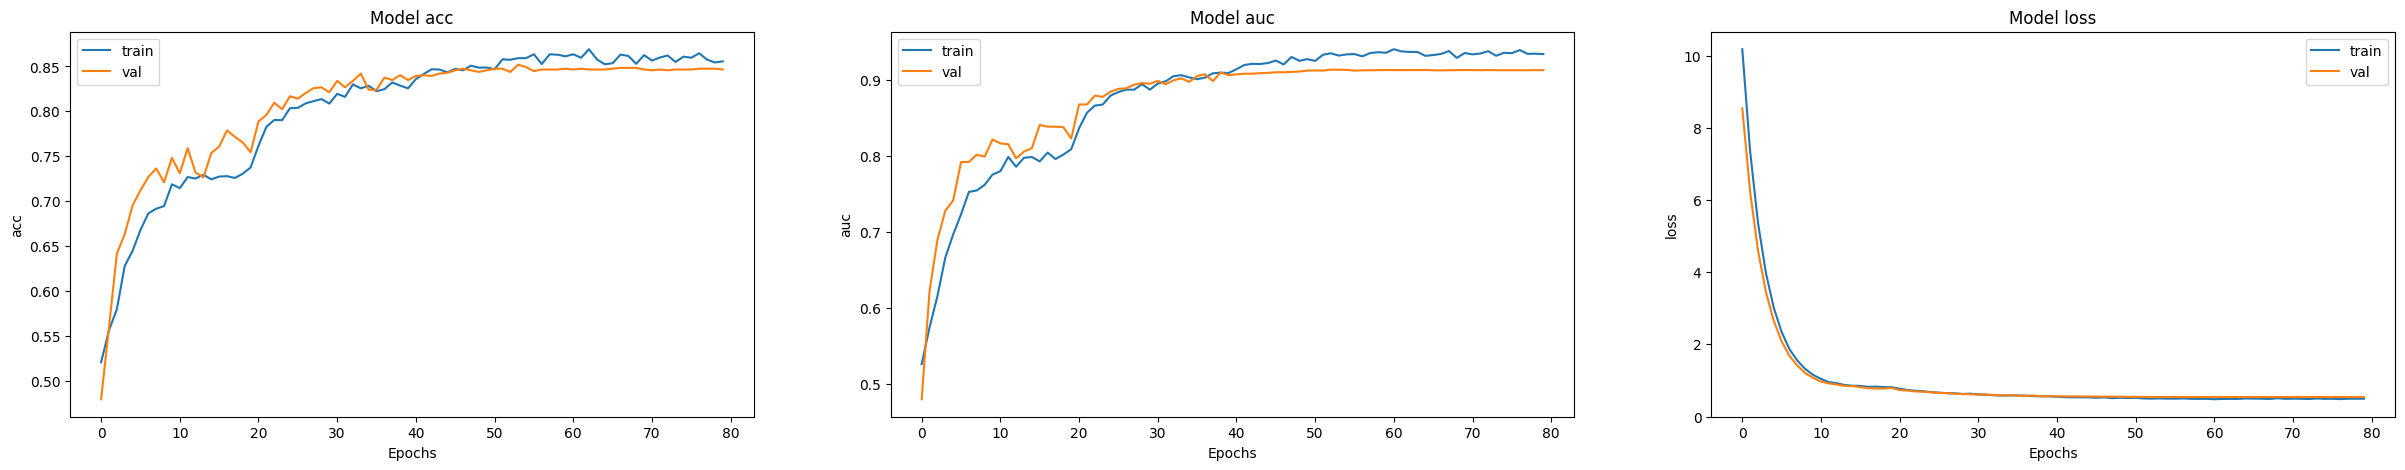

In [48]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history.history[metric])
    ax[i].plot(history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [49]:
#Evaluating the model on the data

#train_scores = model.evaluate(train_data, train_labels)
#val_scores = model.evaluate(val_data, val_labels)
test_scores = custom_inception_model.evaluate(test_data, test_labels)

#print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
#print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

44/44 [==============================] - 7s 156ms/step - loss: 0.5707 - acc: 0.8312 - auc: 0.9012
Testing Accuracy: 83.12%


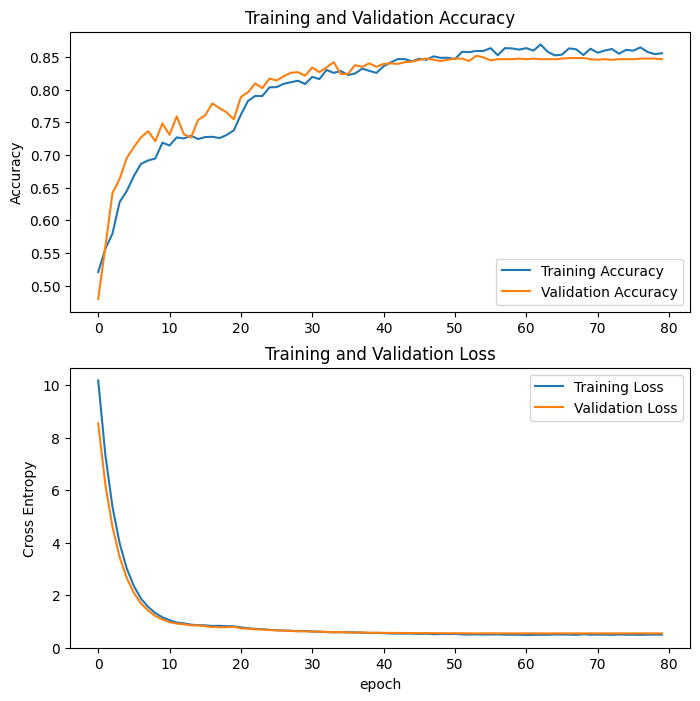

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### 把訓練集前10組影像帶進去看輸出值

In [51]:
#Predicting the test data

pred_labels = custom_inception_model.predict(test_data[:10])  

pred_labels,test_labels[:10]

(array([[0.8379408 , 0.16205576],
        [0.9379424 , 0.06206795],
        [0.890256  , 0.10974869],
        [0.95340705, 0.04659823],
        [0.12202325, 0.87797326],
        [0.9055948 , 0.09440809],
        [0.8874101 , 0.11258788],
        [0.01374761, 0.9862505 ],
        [0.8734701 , 0.12653482],
        [0.65903616, 0.3409472 ]], dtype=float32),
 array([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1]]))

### Fine Tuning

In [52]:
inception_model.trainable = True

In [54]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(inception_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 16

# Freeze all the layers before the `fine_tune_at` layer
for layer in inception_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  22


In [55]:
for layer in custom_inception_model.layers[1:]:
    layer.trainable = True

In [56]:
for layer in custom_inception_model.layers:
    print(f"Layer: {layer.name}, Trainable: {layer.trainable}")


Layer: vgg19, Trainable: True
Layer: dropout, Trainable: True
Layer: global_average_pooling2d, Trainable: True
Layer: flatten, Trainable: True
Layer: batch_normalization, Trainable: True
Layer: dense, Trainable: True
Layer: batch_normalization_1, Trainable: True
Layer: dropout_1, Trainable: True
Layer: dense_1, Trainable: True
Layer: batch_normalization_2, Trainable: True
Layer: dropout_2, Trainable: True
Layer: dense_2, Trainable: True
Layer: batch_normalization_3, Trainable: True
Layer: dropout_3, Trainable: True
Layer: dense_3, Trainable: True
Layer: dropout_4, Trainable: True
Layer: batch_normalization_4, Trainable: True
Layer: dense_4, Trainable: True


### 打開參數後查看的裡面輸出值

In [65]:
#Predicting the test data

pred_labels = custom_inception_model.predict(test_data[:10])  

pred_labels,test_labels[:10]

(array([[0.6185419 , 0.38145953],
        [0.7398117 , 0.26018947],
        [0.9160189 , 0.08398153],
        [0.6900555 , 0.30994573],
        [0.21057616, 0.789421  ],
        [0.6665771 , 0.3334242 ],
        [0.8188314 , 0.1811695 ],
        [0.4060669 , 0.5939345 ],
        [0.60404724, 0.3959542 ],
        [0.6146215 , 0.38537985]], dtype=float32),
 array([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1]]))

In [57]:
history.history['lr']

[0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 9.999999e-05,
 9.999999e-05,
 9.999999e-06,
 9.999999e-06,
 9.999999e-07,
 9.999999e-07,
 9.999999e-08,
 9.999999e-08,
 9.999999e-09,
 9.999999e-09,
 9.999999e-10,
 9.999999e-10,
 9.999999e-10,
 9.999999e-10,
 9.999999e-10,
 9.999999e-11,
 9.999999e-11,
 9.999999e-12,
 9.999999e-12,
 9.999999e-13,
 9.999999e-13,
 9.999999e-14,
 9.999999e-14]

In [43]:
history.history['lr'][-1]

9.999999e-19

In [58]:
base_learning_rate = 0.000001

#tf.keras.optimizers.Adam(lr=base_learning_rate)
#tf.keras.optimizers.RMSprop(lr=base_learning_rate/10)

In [59]:
custom_inception_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
                              loss=tf.keras.losses.BinaryCrossentropy(),
                              metrics=METRICS)

custom_inception_model.summary()

Model: "inception_cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 8, 8, 512)         20024384  
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 512)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)       

d:\CONDA\envs\bigwind_3.7\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [60]:
len(inception_model.trainable_variables)

0

### Continue training the model

In [61]:
history.epoch[-1]

79

In [62]:
fine_tune_epochs = 70
total_epochs =  EPOCHS + fine_tune_epochs

history_fine = custom_inception_model.fit(train_data, train_labels, 
                                          validation_data=(val_data, val_labels), 
                                          epochs=total_epochs,
                                          initial_epoch=history.epoch[-1],
                                          callbacks=CALLBACKS) 

 

Epoch 80/150
139/139 [==============================] - 29s 192ms/step - loss: 0.5126 - acc: 0.8456 - auc: 0.9195 - val_loss: 0.5419 - val_acc: 0.8457 - val_auc: 0.9130
Epoch 80: Learning rate is 0.000001
Epoch 81/150
139/139 [==============================] - 19s 138ms/step - loss: 0.4999 - acc: 0.8565 - auc: 0.9312 - val_loss: 0.5419 - val_acc: 0.8493 - val_auc: 0.9130
Epoch 81: Learning rate is 0.000001
Epoch 82/150
139/139 [==============================] - 19s 138ms/step - loss: 0.5037 - acc: 0.8538 - auc: 0.9300 - val_loss: 0.5421 - val_acc: 0.8466 - val_auc: 0.9131

Epoch 00082: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.
Epoch 82: Learning rate is 0.000000
Epoch 83/150
139/139 [==============================] - 19s 138ms/step - loss: 0.5161 - acc: 0.8470 - auc: 0.9238 - val_loss: 0.5425 - val_acc: 0.8475 - val_auc: 0.9127
Epoch 83: Learning rate is 0.000000
Epoch 84/150
139/139 [==============================] - 19s 138ms/step - loss: 0.5108 - acc: 0.8493

In [63]:
history_fine.history.keys()

dict_keys(['loss', 'acc', 'auc', 'val_loss', 'val_acc', 'val_auc', 'lr'])

In [64]:
history.history['lr']

[0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 0.0009999999,
 9.999999e-05,
 9.999999e-05,
 9.999999e-06,
 9.999999e-06,
 9.999999e-07,
 9.999999e-07,
 9.999999e-08,
 9.999999e-08,
 9.999999e-09,
 9.999999e-09,
 9.999999e-10,
 9.999999e-10,
 9.999999e-10,
 9.999999e-10,
 9.999999e-10,
 9.999999e-11,
 9.999999e-11,
 9.999999e-12,
 9.999999e-12,
 9.999999e-13,
 9.999999e-13,
 9.999999e-14,
 9.999999e-14]

In [65]:
history_fine.history['lr']

[1e-06,
 1e-06,
 1e-06,
 1e-07,
 1e-07,
 1e-08,
 1e-08,
 1e-09,
 1e-09,
 1e-09,
 9.9999994e-11,
 9.9999994e-11,
 9.999999e-12,
 9.999999e-12,
 9.999999e-13,
 9.999999e-13,
 9.999999e-14,
 9.999999e-14,
 9.999999e-15,
 9.999999e-15,
 9.999999e-16,
 9.999999e-16,
 9.999999e-17,
 9.999999e-17,
 9.999999e-18,
 9.999999e-18,
 9.999999e-19,
 9.999999e-19,
 1e-19,
 1e-19,
 1e-20,
 1e-20,
 1e-21,
 1e-21,
 9.9999997e-23,
 9.9999997e-23,
 1e-23,
 1e-23,
 1e-24,
 1e-24,
 1e-25,
 1e-25,
 1e-26,
 1e-26,
 1e-27,
 1e-27,
 1e-28,
 1e-28,
 1e-29,
 1e-29,
 1e-30,
 1e-30,
 1e-31,
 1e-31,
 9.9999995e-33,
 9.9999995e-33,
 9.999999e-34,
 9.999999e-34,
 9.999999e-35,
 9.999999e-35,
 9.9999995e-36,
 9.9999995e-36,
 9.9999995e-37,
 9.9999995e-37,
 1e-37,
 1e-37,
 1e-38,
 1e-38,
 1e-39,
 1e-39,
 1e-40]

In [66]:
history_fine.history['val_acc'] == history_fine.history['val_loss']

False

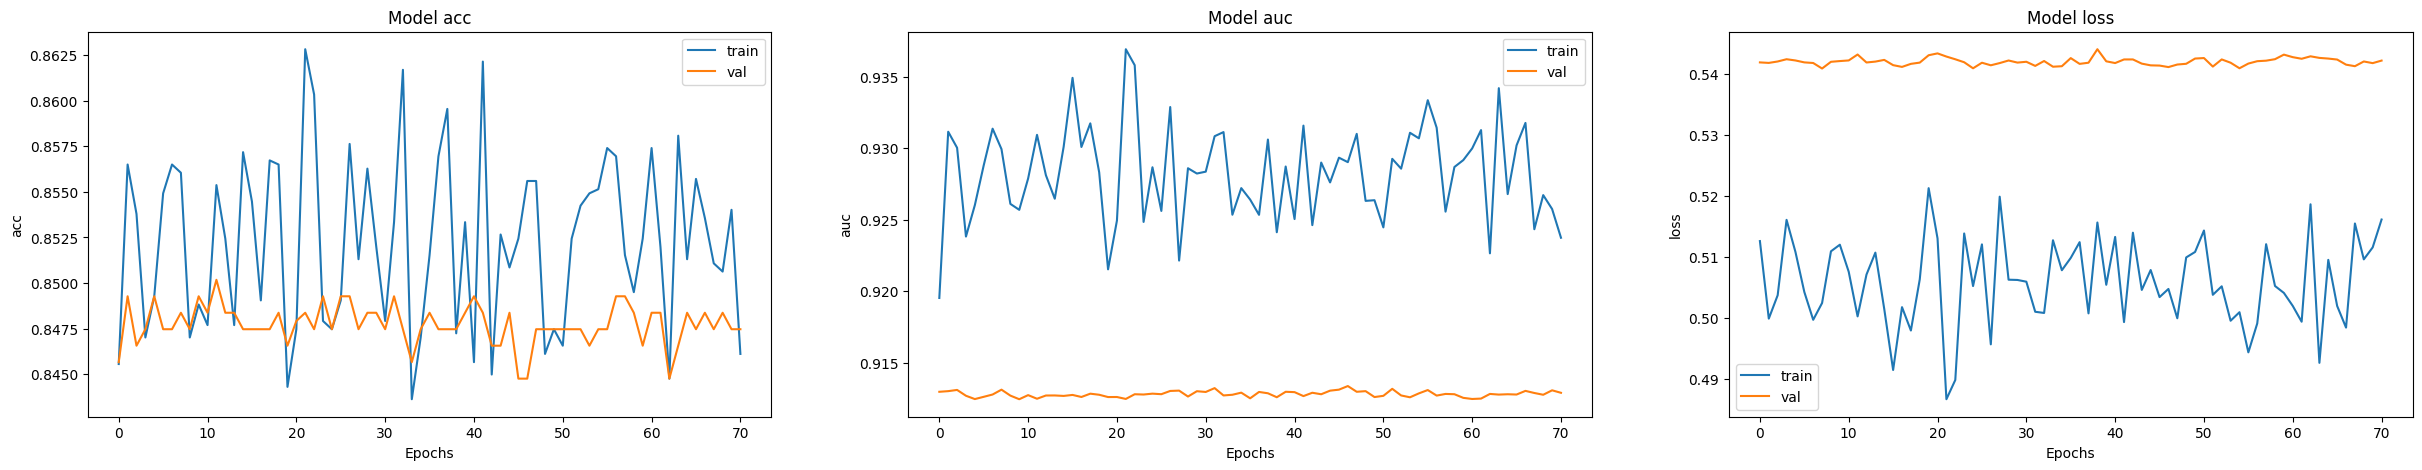

In [67]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(history_fine.history[metric])
    ax[i].plot(history_fine.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [68]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [69]:
len(acc)

151

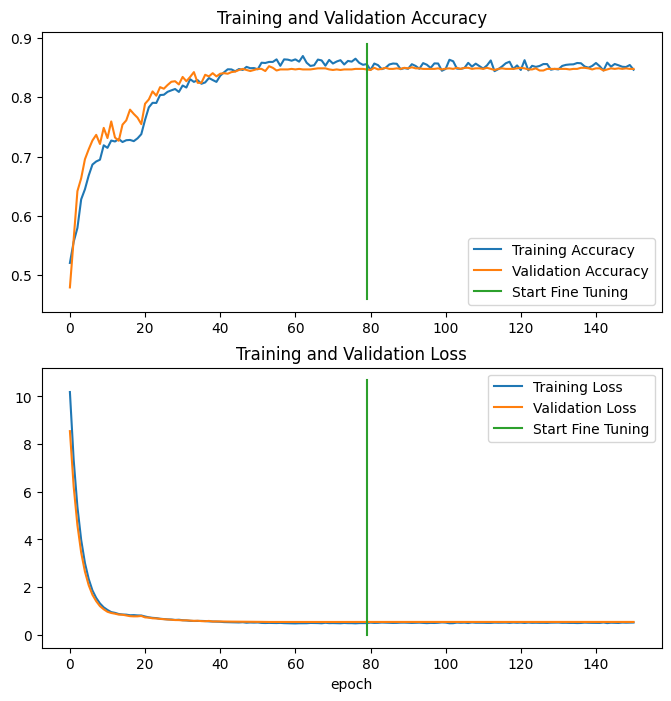

In [70]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
#plt.ylim([0.8, 1])
plt.plot([EPOCHS-1,EPOCHS-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
#plt.ylim([0, 1.0])
plt.plot([EPOCHS-1,EPOCHS-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Evaluating the model on the Test data

In [71]:
#Evaluating the model on the data

#train_scores = model.evaluate(train_data, train_labels)
#val_scores = model.evaluate(val_data, val_labels)
test_scores = custom_inception_model.evaluate(test_data, test_labels)

#print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
#print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

44/44 [==============================] - 5s 106ms/step - loss: 0.5726 - acc: 0.8304 - auc: 0.9015
Testing Accuracy: 83.04%


In [72]:
#Predicting the test data

pred_labels = custom_inception_model.predict(test_data)  

pred_labels,test_labels

(array([[0.84531707, 0.15467325],
        [0.9451896 , 0.05480757],
        [0.90363723, 0.09635802],
        ...,
        [0.01474407, 0.9852588 ],
        [0.01915627, 0.9808473 ],
        [0.87284666, 0.12714086]], dtype=float32),
 array([[1, 0],
        [1, 0],
        [1, 0],
        ...,
        [0, 1],
        [0, 1],
        [1, 0]]))

In [73]:
#Print the classification report of the tested data

#Since the labels are softmax arrays, we need to roundoff to have it in the form of 0s and 1s,
#similar to the test_labels
def roundoff(arr):
    """To round off according to the argmax of each predicted label array. """
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels, target_names=CLASSES))

              precision    recall  f1-score   support

          CN       0.84      0.84      0.84       729
          AD       0.82      0.82      0.82       657

   micro avg       0.83      0.83      0.83      1386
   macro avg       0.83      0.83      0.83      1386
weighted avg       0.83      0.83      0.83      1386
 samples avg       0.83      0.83      0.83      1386



In [62]:
test_labels

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

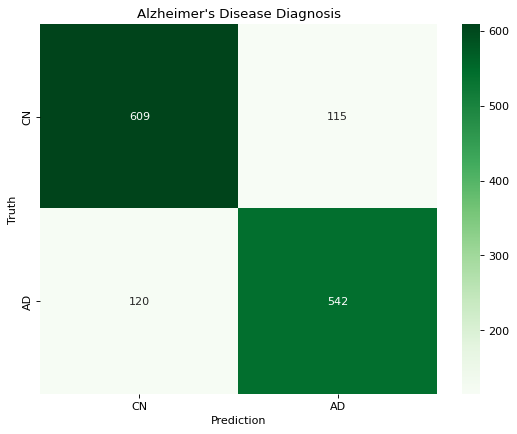

In [74]:
#Plot the confusion matrix to understand the classification in detail

pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(pred_ls, test_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels= CLASSES,
                yticklabels=CLASSES)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [71]:
#Saving the model for future use    #模型名稱 : 數據量_EPOCH_
save_path = "D:/bigwind/model_save_hippocampus/"
custom_inception_model_dir = save_path + "CN_AD_Binary_hippocampus_InceptionV3_EPOCH350"
custom_inception_model.save(custom_inception_model_dir, save_format='h5')
os.listdir(save_path)

['CN_AD_Binary_hippocampus_InceptionV3_EPOCH350',
 'CN_AD_Binary_hippocampus_MobileNet_EPOCH350',
 'CN_AD_Binary_hippocampus_ResNet50_EPOCH350',
 'CN_AD_Binary_hippocampus_VGG19_EPOCH350',
 'CN_MCI_Binary_hippocampus_MobileNet_EPOCH350',
 'CN_MCI_Binary_hippocampus_ResNet50_EPOCH350',
 'CN_MCI_Binary_hippocampus_VGG19_EPOCH350',
 'ventricle_hippocampus_stacking',
 'ventricle_hippocampus_stacking_CNMCI']